In [26]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime,date
from sqlalchemy import create_engine

# File to Load
CESDF=pd.read_pickle('resources/CES2020.pkl',compression='gzip')

# Output File (CSV)
output_data_file = "Resources/Industry_Data.csv"

# Preview of the DataFrame
CESDF.head()

,series_id,year,value,industry_code_x,Month,supersector_code,data_type_code,series_title,supersector_name,data_type_text,short_title
0,CES0000000001,2015,140568.0,00000000,1,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
1,CES0000000001,2015,140839.0,00000000,2,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
2,CES0000000001,2015,140910.0,00000000,3,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
3,CES0000000001,2015,141194.0,00000000,4,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
4,CES0000000001,2015,141525.0,00000000,5,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees


In [27]:
# Check for correct data types - need to convert
CESDF.dtypes

series_id            object
year                  int64
value               float64
industry_code_x      object
Month                 int32
supersector_code     object
data_type_code       object
series_title         object
supersector_name     object
data_type_text       object
short_title          object
dtype: object

In [28]:
# Check column names for spaces - looks good
CESDF.columns

Index(['series_id', 'year', 'value', 'industry_code_x', 'Month',
       'supersector_code', 'data_type_code', 'series_title',
       'supersector_name', 'data_type_text', 'short_title'],
      dtype='object')

In [29]:
# Identify incomplete rows
CESDF.count()

series_id           4020
year                4020
value               4020
industry_code_x     4020
Month               4020
supersector_code    4020
data_type_code      4020
series_title        4020
supersector_name    4020
data_type_text      4020
short_title         4020
dtype: int64

In [32]:
# Check series values
CESDF['series_id'].nunique()

62

In [33]:
# Isolate data to series data needed
series = ["CES0000000001","CES0500000001","CES0600000001","CES0700000001","CES0800000001",
"CES1000000001","CES2000000001","CES3000000001","CES3100000001","CES3200000001",
"CES4000000001","CES4200000001","CES4300000001","CES5000000001","CES5500000001",
"CES5552000001","CES5553000001","CES6000000001","CES6054000001","CES6055000001",
"CES6056000001","CES6500000001","CES6561000001","CES6562000001","CES7000000001",
"CES7071000001","CES7072000001","CES8000000001","CES9000000001","CES9091000001",
"CES9092000001","CES9093000001"]

condition = CESDF['series_id'].isin(series)
CESSeriesDF = CESDF[condition]
CESSeriesDF.head()

,series_id,year,value,industry_code_x,Month,supersector_code,data_type_code,series_title,supersector_name,data_type_text,short_title
0,CES0000000001,2015,140568.0,00000000,1,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
1,CES0000000001,2015,140839.0,00000000,2,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
2,CES0000000001,2015,140910.0,00000000,3,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
3,CES0000000001,2015,141194.0,00000000,4,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees
4,CES0000000001,2015,141525.0,00000000,5,00,01,"All employees, thousands, total nonfarm, seaso...",Total nonfarm,"ALL EMPLOYEES, THOUSANDS",All employees


In [34]:
# Get rows and columns count
CESSeriesDF.shape

(2080, 11)

In [23]:
# Choose columns and create a date column with year and month
df = CESSeriesDF[['year','Month','value','short_title']]
df['date']=df['year'].astype(str) + "-"+ df['Month'].astype(str) 
df.head()

C:\Users\danjr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,Month,value,short_title,date
0,2015,1,140568.0,All employees,2015-1
1,2015,2,140839.0,All employees,2015-2
2,2015,3,140910.0,All employees,2015-3
3,2015,4,141194.0,All employees,2015-4
4,2015,5,141525.0,All employees,2015-5


In [24]:
# Rename short_title categories
df['industry']=df['short_title'].replace({
        'All employees':'all_employees',
        'All employees accommodation and food services':'accom_food_services',
        'All employees administrative and waste services': 'admin_and_waste_services',
        'All employees arts entertainment and recreation': 'arts_entertainment_and_recreation',
        'All employees construction':'construction',
        'All employees durable goods': 'durable_goods',
        'All employees education and health services': 'edu_and_health_services',
        'All employees educational services':'educational_services',
        'All employees federal':'federal',
        'All employees finance and insurance':'finance_and_insurance',
        'All employees financial activities':'financial_activities',
        'All employees goods-producing':'goods_producing',
        'All employees government':'government',
        'All employees health care and social assistance':'healthcare_and_social assistance',
        'All employees information':'information',
        'All employees leisure and hospitality':'leisure_and_hospitality',
        'All employees local government':'local_government',
        'All employees management of companies and enterprises':'mgmt_of_companies_and_enterprises',
        'All employees manufacturing':'manufacturing',
        'All employees mining and logging':'mining_and_logging',
        'All employees nondurable goods':'nondurable_goods',
        'All employees other services':'other_services',
        'All employees private':'private',
        'All employees private service-providing':'private_service_providing',
        'All employees professional and business services':'professional_and_business_services',
        'All employees professional and technical services':'professional_and_technical_services',
        'All employees real estate and rental and leasing':'real_estate_and_rental_leasing',
        'All employees retail trade':'retail_trade',
        'All employees service-providing':'service-providing',
        'All employees state government':'state_government',
        'All employees trade transportation and utilities':'trade_transportation_and_utilities',
        'All employees transportation and warehousing':'transportation_and_warehousing',
    })
df.head()    

C:\Users\danjr\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,year,Month,value,short_title,date,industry
0,2015,1,140568.0,All employees,2015-1,all_employees
1,2015,2,140839.0,All employees,2015-2,all_employees
2,2015,3,140910.0,All employees,2015-3,all_employees
3,2015,4,141194.0,All employees,2015-4,all_employees
4,2015,5,141525.0,All employees,2015-5,all_employees


In [42]:
# Rename columns and drop short_tite
df=df.rename(
    columns = {
        'Month':'month',
        'value':'claims'
        })

final_df = df[['date','year','month','industry','claims']]
final_df.head()

,date,year,month,industry,claims
0,2015-1,2015,1,all_employees,140568.0
1,2015-2,2015,2,all_employees,140839.0
2,2015-3,2015,3,all_employees,140910.0
3,2015-4,2015,4,all_employees,141194.0
4,2015-5,2015,5,all_employees,141525.0


In [25]:
# Format the data using pivot
#df = pd.pivot_table(df,index=['date'],values=['value'],columns=['short_title'])

#df.head()

In [27]:
# Reset index
#df.reset_index(inplace=True)
#df.columns

MultiIndex([( 'date',                                                      ''),
            ('value',                                         'All employees'),
            ('value',         'All employees accommodation and food services'),
            ('value',       'All employees administrative and waste services'),
            ('value',       'All employees arts entertainment and recreation'),
            ('value',                            'All employees construction'),
            ('value',                           'All employees durable goods'),
            ('value',           'All employees education and health services'),
            ('value',                    'All employees educational services'),
            ('value',                                 'All employees federal'),
            ('value',                   'All employees finance and insurance'),
            ('value',                    'All employees financial activities'),
            ('value',                   

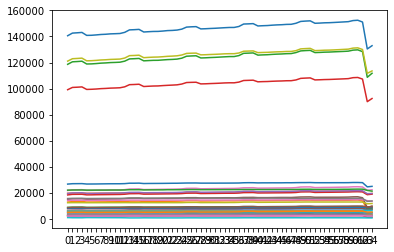

In [28]:
# Test plot
#ax = df.plot(xticks=df.index,legend=False)


In [44]:
# Export clean data to CSV for analysis
final_df.to_csv(output_data_file, index = False)